## 1. Load Datasets

First, load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

In [1]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_user = pd.read_csv('../data/takehome_users.csv', encoding='latin-1')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


`last_session_creation_time` and `invited_by_user_id` have missing values. Other columns have no missing values.

Let's load the other spreadsheet.

In [4]:
df_engagement = pd.read_csv('../data/takehome_user_engagement.csv', parse_dates=['time_stamp'])
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


This spreadsheet doesn't have any missing values.

## 2. Data Wrangling

#### Handle missing values for user dataset

For `last_session_creation_time` column, if there is a misisng value, we assume the last session time is the creation time.

In [6]:
df_user['last_session_creation_time'] = df_user['last_session_creation_time'].fillna(df_user['creation_time'])
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  object 
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 937.6+ KB


For `invited_by_user_id` column, if there is a missing value, we assume the value is 0.

In [7]:
df_user['invited_by_user_id'] = df_user['invited_by_user_id'].fillna(0)
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  object 
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 937.6+ KB


Drop the duplicate.

In [8]:
df_user.drop_duplicates(inplace=True)

Review the dataset.

In [9]:
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6000.500000,3464.245950,1.0,3000.75,6000.5,9000.25,12000.0
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.00,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.00,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.00,108.0,238.25,416.0
invited_by_user_id,12000.0,3188.691333,3869.027693,0.0,0.00,875.0,6317.00,11999.0


#### Check any duplicate and finalize engagement dataset

In [10]:
df_engagement.drop_duplicates(inplace=True)

In [11]:
df_engagement.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


## 3. EDA

Identify the 'adopted user': the person has logged into the product on three separate days in at least one seven-day period

In [12]:
user = df_engagement['user_id'].unique()

temp = []
for user in user:
    data = df_engagement[df_engagement['user_id'] == user]
    adopted = int(any(data.time_stamp.dt.date.diff(2) <= timedelta(7)))
    temp.append([user, adopted])

df_adopted = pd.DataFrame(temp, columns=['user_id', 'adopted'])

df_user.rename(columns={'object_id': 'user_id'}, inplace=True)
combined = pd.merge(df_user, df_adopted, on='user_id', how='left')
combined['adopted'] = combined['adopted'].fillna(0).astype(int)

In [13]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  object 
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  adopted                     12000 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 1.1+ MB


Last, if the values in `invited_by_user` column are not 0, covert it to 1.

In [14]:
combined.loc[combined['invited_by_user_id'] > 0, 'invited_by_user_id'] = 1

In [15]:
combined.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810.0,1,0,11,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.0,0,0,1,1.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892.0,0,0,94,1.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168.0,0,0,1,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660.0,0,0,193,1.0,0


The adopted users are identified. Next, machine learning model is used to determine which factors predict future user adoption.

## 4. Pre-processing and Training

First, create the dummies for `creation_source` column.

In [16]:
df_dummies = pd.get_dummies(combined, columns=['creation_source'], drop_first=True)

In [17]:
df_dummies.head()

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1398138810.0,1,0,11,1.0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1396237504.0,0,0,1,1.0,1,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1363734892.0,0,0,94,1.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1369210168.0,0,0,1,1.0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1358849660.0,0,0,193,1.0,0,0,0,0,0


Next, we only keep the features which will be used in the modeling. Based on the description of each feature, we will keep `opted_in_to_mailing_list`, `invited_by_user_id`, `enabled_for_marketing_drip`, `creation_source_ORG_INVITE`, `creation_source_PERSONAL_PROJECTS`, `creation_source_SIGNUP`, `creation_source_SIGNUP_GOOGLE_AUTH`, and `adopted` - which is the target.

In [18]:
df = df_dummies[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited_by_user_id',
                 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 
                 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH', 'adopted']]

In [19]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted
0,1,0,1.0,0,0,0,0,0
1,0,0,1.0,1,0,0,0,1
2,0,0,1.0,1,0,0,0,0
3,0,0,1.0,0,0,0,0,0
4,0,0,1.0,0,0,0,0,0


#### Split the data into test and train subsets

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(['adopted'], axis=1)
y = df[['adopted']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

In [21]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8400, 7) (8400, 1) (3600, 7) (3600, 1)


## 5. Modeling

#### Use Random Forest Classification model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=300, random_state = 42, n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)

ac = accuracy_score(y_test, y_pred)

print('Accuracy score is: ', ac)
print('Classification Report \n', classification_report(y_test, y_pred))
print('Confusion Matrix \n', confusion_matrix(y_test, y_pred))

C:\Users\Cheng\AppData\Local\Temp\ipykernel_14100\639578602.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res = clf.fit(X_train, y_train)


Accuracy score is:  0.8619444444444444
Classification Report 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      3103
           1       0.00      0.00      0.00       497

    accuracy                           0.86      3600
   macro avg       0.43      0.50      0.46      3600
weighted avg       0.74      0.86      0.80      3600

Confusion Matrix 
 [[3103    0]
 [ 497    0]]


C:\Users\Cheng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Plot feature importances

Text(0.5, 1.0, 'Feature Importances')

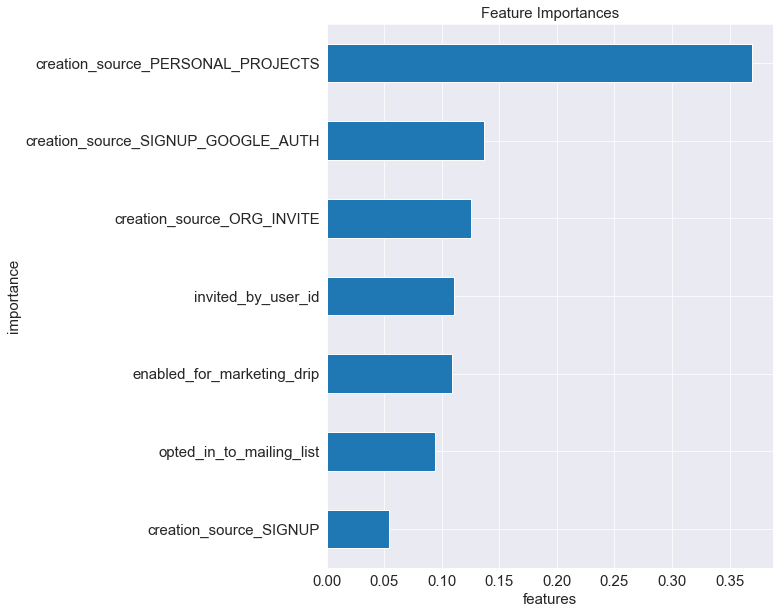

In [23]:
feature_importance = clf.feature_importances_

feat_imps = pd.Series(feature_importance, index=X_train.columns).sort_values()

plt.subplots(figsize=(8,10))
feat_imps.plot(kind='barh')
plt.xlabel('features', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Feature Importances', fontsize=15)

The 'creation_source' features by personal projects and organization invite have the most importance, followed by 'ebabled for marketing drip', and others.

## 6. Summary

The random forest classification model has an accuracy of 0.86. Additionally, the 'creation_source' features by personal projects and organization invite have the most importance, followed by 'ebabled for marketing drip', and others.